# Marketing Mix Modeling on Advertising and Sales Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Princy/Downloads/Advertising.csv')

In [3]:
print(df.columns)
df.describe()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We can see that the variable, Unnamed: 0, is essentially an index starting at 1 — so we’re going to remove it.

In [4]:
df = df.copy().drop(['Unnamed: 0'],axis=1)

### Exploratory Data Analysis (EDA)

- For conducting exploratory data analyses, we will focus on the three most common:
    - Correlation matrices: a table that shows the correlation values for each pair-relationship
    - Pair plots: a simple way to visualize the relationships between each variable
    - Feature importance: techniques that assign a score for each feature based on how useful they are at predicting the target variable

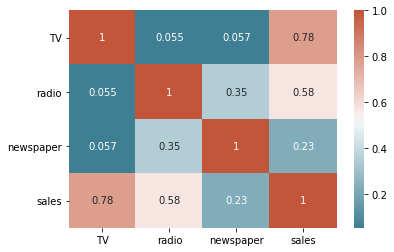

In [6]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The correlation matrix above shows that there’s a strong correlation between TV and sales (0.78), a moderate correlation between radio and sales (0.58), and a weak correlation between newspaper and sales (0.23). It’s still too early to conclude anything but this is good to keep into consideration moving forward.

### Pair plot

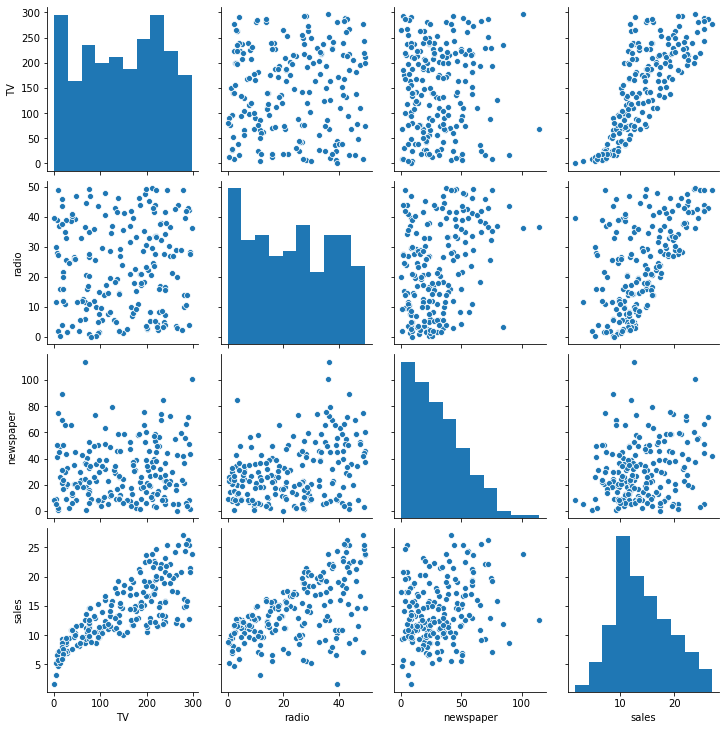

In [7]:
sns.pairplot(df)

We can see some consistency between our pair plot and our original correlation matrix. It looks like there’s a strong positive relationship between TV and sales, less for radio, and even less for newspapers.

### Feature Importance
Feature importance allows you to determine how “important” each input variable is to predict the output variable. A feature is important if shuffling its values increases model error because this means the model relied on the feature for the prediction.

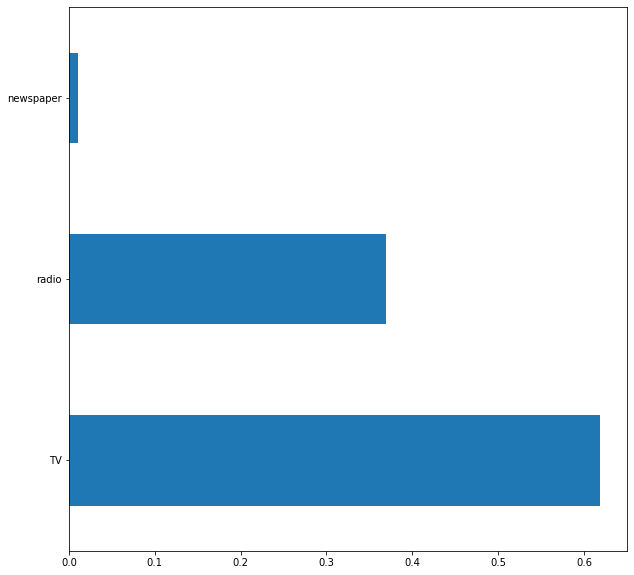

In [8]:
# Setting X and y variables
X = df.loc[:, df.columns != 'sales']
y = df['sales']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

There seems to be a pattern, where TV is the most important, followed by radio, leaving newspaper last. Let’s actually build our OLS regression model.

### OLS Model
OLS, short for Ordinary Least Squares, is a method used to estimate the parameters in a linear regression model. 
An OLS model is a type of regression model that is most commonly used when building marketing mix models.

We create our ordinary least squares regression model, which specifies that we’re predicting sales based on TV, radio, and newspaper marketing dollars.

In [9]:
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        21:24:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### Interpreting Marketing Mix model

**.summary()** provides us with an abundance of insights on our model. I’m going to point out two main things that are most useful for us in this:

- **The Adj. R-squared is 0.896**. This means that approximately 90% of the total variation in the data can be explained by the model. This also means that the model doesn’t account for 10% of the data used — this could be due to missing variables, for example if there was another marketing channel that wasn’t included, or simply due to noise in the data.
- **At the top half, you can see Prob (F-statistic): 1.58e-96**. This probability value (p-value) represents the likelihood that there are no good predictors of the target variable — in this case, there are no good predictors of sales. Since the p-value is close to zero, we know that there is at least one predictor in the model that is a good predictor of sales.
- **If we look at the column, P>|t|, we can see the p-values for each predictor**. The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which indicates that newspaper spend has no significant impact on sales. Generally, we want the p-value to be less than 1% or 5%, which are the two standards in practice.

###  Plot Actual vs Predicted Values
We graph the predicted sales values with the actual sales values to visually see how our model performs. This is a particularly useful thing to do in a business use case if we are trying to see how well our model reflects what is actually happening — in this case, if we are trying to see how well our model predicts sales based on the amount spent in each marketing channel.

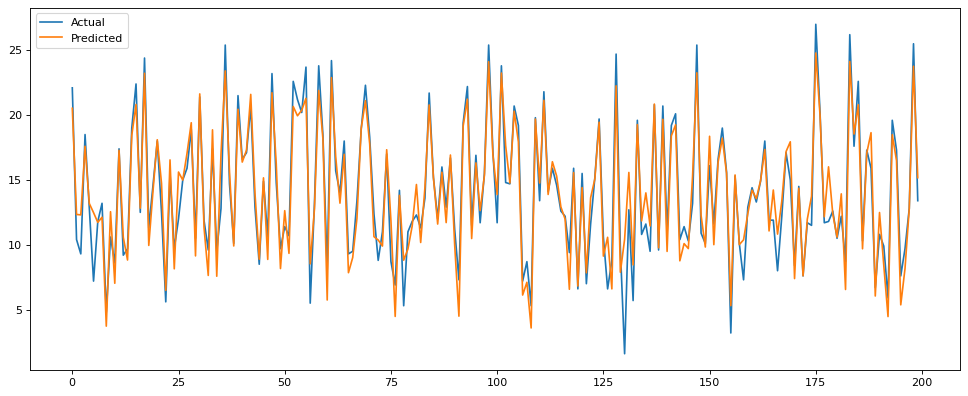

In [12]:
# Defining Actual and Predicted values
y_pred = model.predict()
labels = df['sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

It seems like the model does a good job of predicting sales given TV, radio, and newspaper spend.